In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv("Ratings.csv")

In [3]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
ratings.shape

(1149780, 3)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
ratings.duplicated().sum()

0

In [8]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:
ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [10]:
# remove zero ratings
ratings_cleaned = ratings[ratings['Book-Rating']!=0]

In [11]:
books = pd.read_csv("Books.csv")

C:\Users\krish\AppData\Local\Temp\ipykernel_23668\765333460.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [12]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [13]:
books.shape

(271360, 8)

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [19]:
books.duplicated().sum()

0

In [20]:
books.drop_duplicates(inplace=True)

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [38]:
books.loc[books["ISBN"] == "078946697X", "Book-Title"] = (
    "DK Readers: Creating the X-Men, How It All Began"
)

books.loc[books["ISBN"] == "078946697X", "Book-Author"] = "Michael Teitelbaum"

books.loc[books["ISBN"] == "078946697X", "Year-Of-Publication"] = "2000"

books.loc[books["ISBN"] == "078946697X", "Publisher"] = "DK Publishing Inc"

books.loc[books["ISBN"] == "2070426769", "Book-Title"] = (
    "Peuple du ciel, suivi de Les Bergers"
)

books.loc[books["ISBN"] == "2070426769", "Book-Author"] = "Jean-Marie Gustave Le Clézio"

books.loc[books["ISBN"] == "2070426769", "Year-Of-Publication"] = "2003"

books.loc[books["ISBN"] == "2070426769", "Publisher"] = "Gallimard"

books.loc[books["ISBN"] == "0789466953", "Book-Title"] = (
    "DK Readers: Creating the X-Men, How Comic Books Come to Life"
)

books.loc[books["ISBN"] == "0789466953", "Book-Author"] = "James Buckley"

books.loc[books["ISBN"] == "0789466953", "Year-Of-Publication"] = "2000"

books.loc[books["ISBN"] == "0789466953", "Publisher"] = "DK Publishing Inc"

In [39]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

In [ ]:
users = pd.read_csv('Users.csv')

In [23]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [24]:
users.shape

(278858, 3)

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [26]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [27]:
users= users.dropna()

In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   168096 non-null  int64  
 1   Location  168096 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


C:\Users\krish\AppData\Local\Temp\ipykernel_23668\1080891518.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=6)
C:\Users\krish\AppData\Local\Temp\ipykernel_23668\1080891518.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=6)


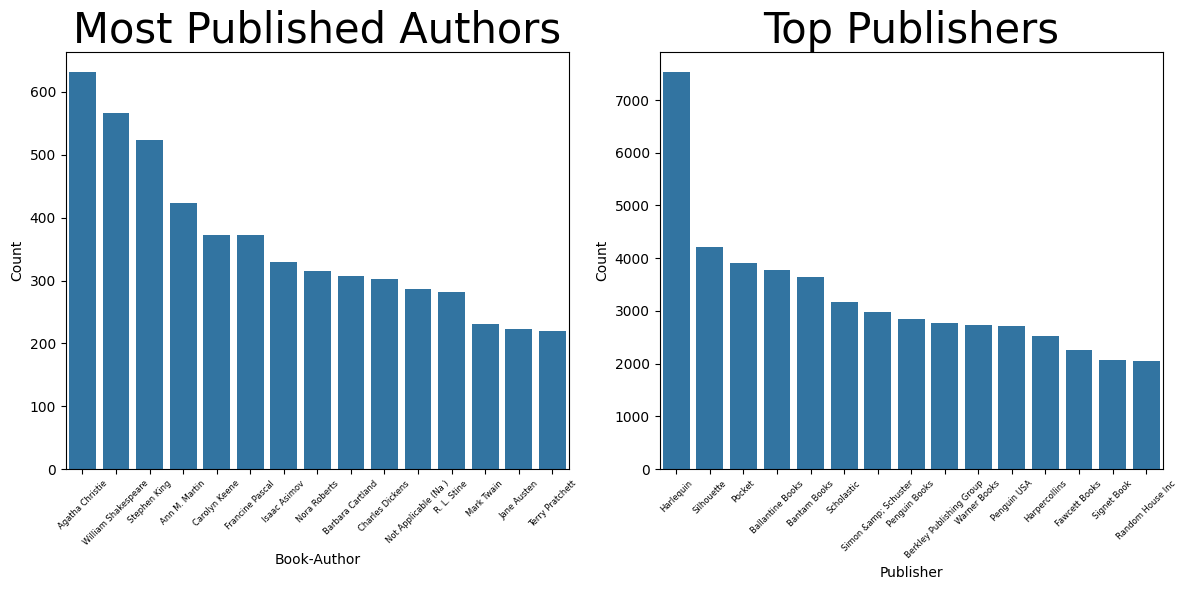

In [40]:
author_count = (
    books["Book-Author"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
    .head(15)
)

publisher_count = (
    books["Publisher"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
    .head(15)
)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1 = sns.barplot(data=author_count, x="Book-Author", y="Count", ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=6)
ax1.set_title("Most Published Authors", size=30)

ax2 = sns.barplot(data=publisher_count, x="Publisher", y="Count", ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=6)
ax2.set_title("Top Publishers", size=30)

plt.tight_layout()

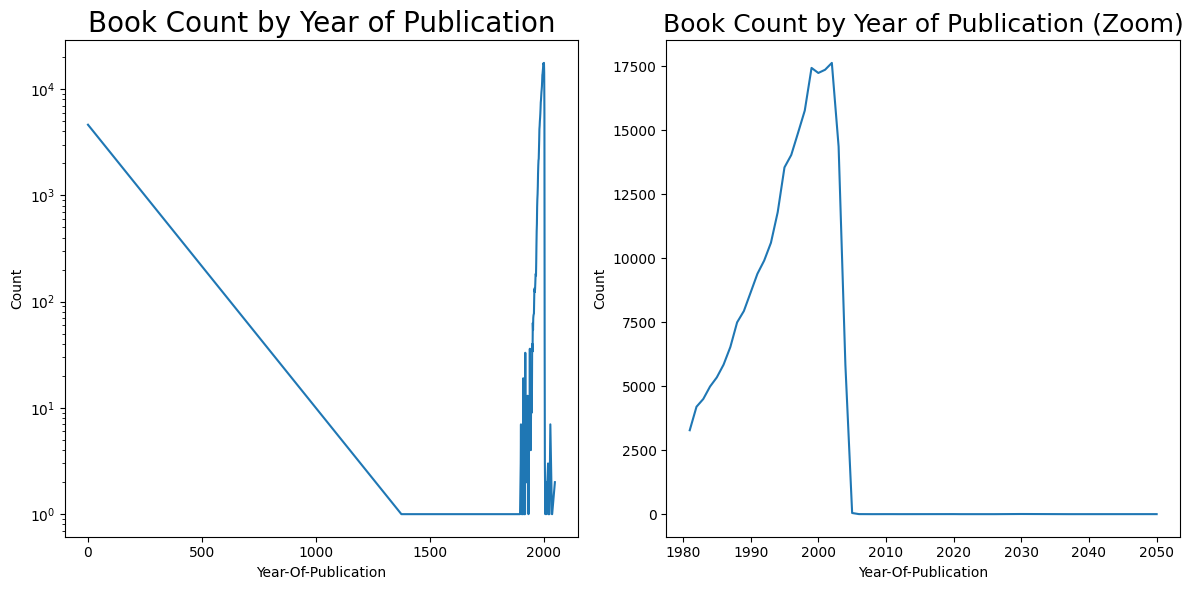

In [41]:
books_by_year = (
    books['Year-Of-Publication']
    .value_counts()
    .reset_index(name="Count")
    .sort_values("Year-Of-Publication", ascending=True)
)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1 = sns.lineplot(data=books_by_year, x="Year-Of-Publication", y="Count", ax=ax1)
ax1.set_yscale("log")
ax1.set_title("Book Count by Year of Publication", fontsize=20)

ax2 = sns.lineplot(
    data=books_by_year[books_by_year["Year-Of-Publication"] > 1980],
    x="Year-Of-Publication",
    y="Count",
    ax=ax2,
)
# ax2.set_yscale('log')
ax2.set_title("Book Count by Year of Publication (Zoom)", fontsize=18)

plt.tight_layout()

C:\Users\krish\AppData\Local\Temp\ipykernel_23668\2083482151.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=8)


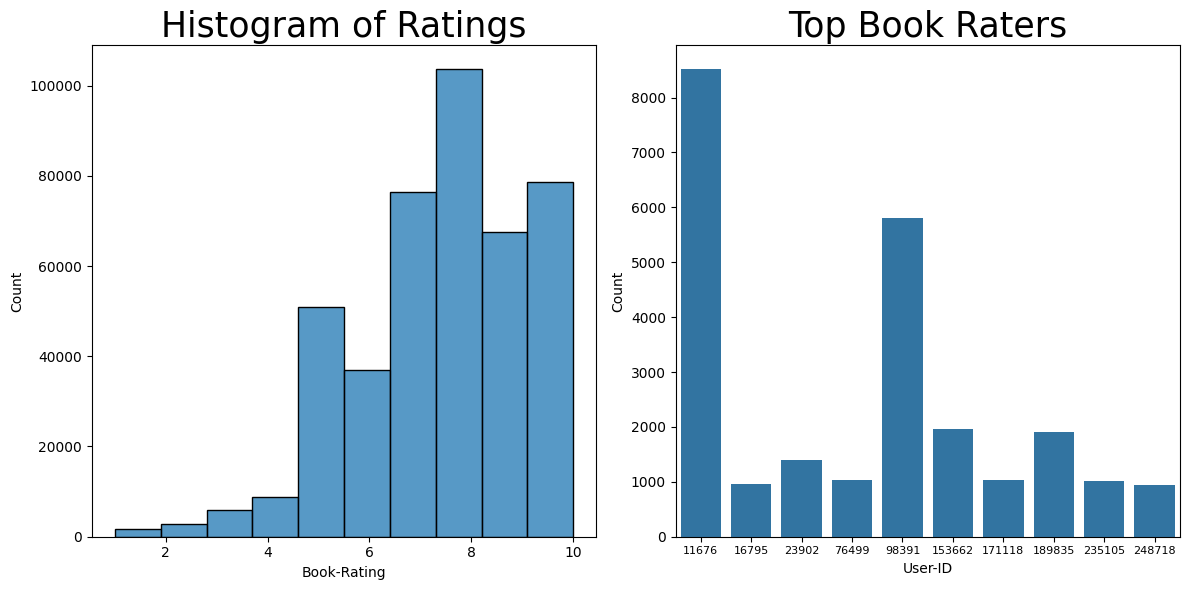

In [42]:
user_count = (
    ratings_cleaned["User-ID"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
    .head(10)
)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1 = sns.histplot(ratings_cleaned, x="Book-Rating", ax=ax1, bins=10)
ax1.set_title("Histogram of Ratings", size=25)

ax2 = sns.barplot(data=user_count, x="User-ID", y="Count", ax=ax2)
ax2.set_title("Top Book Raters", size=25)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=8)

plt.tight_layout()

C:\Users\krish\AppData\Local\Temp\ipykernel_23668\737297147.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=6)
C:\Users\krish\AppData\Local\Temp\ipykernel_23668\737297147.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=6)


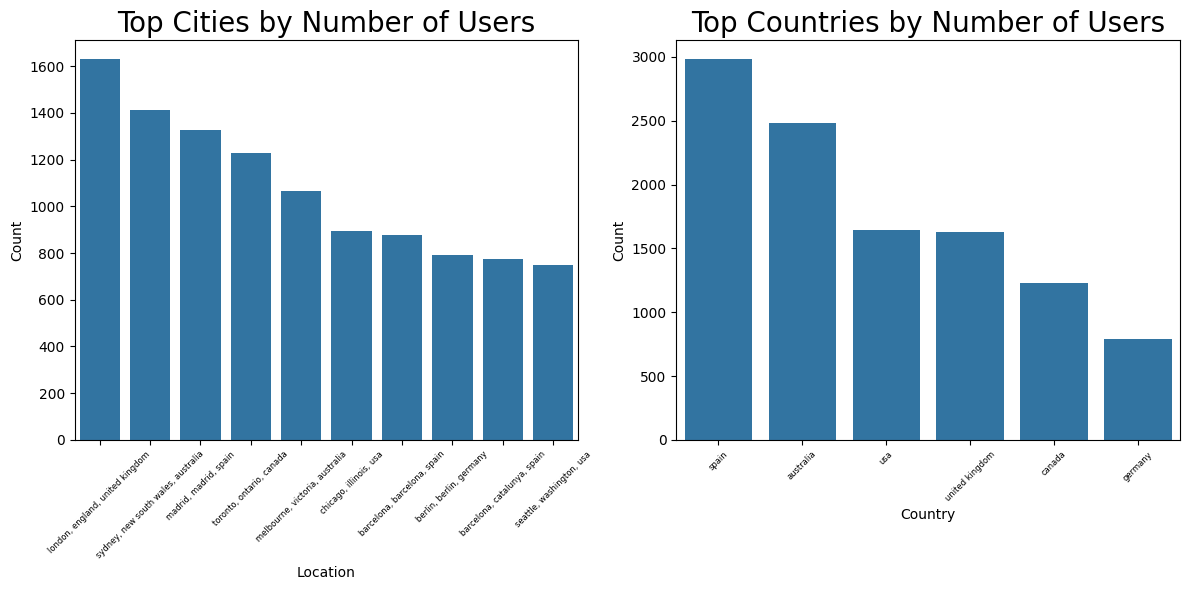

In [43]:
top_locations = (
    users["Location"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
    .head(10)
)

top_locations["Country"] = top_locations["Location"].apply(lambda x: x.split(", ")[2])

top_countries = (
    top_locations.groupby("Country")["Count"]
    .sum()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
    .head(10)
)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1 = sns.barplot(data=top_locations, x="Location", y="Count", ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=6)
ax1.set_title("Top Cities by Number of Users", size=20)

ax2 = sns.barplot(data=top_countries, x="Country", y="Count", ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=6)
ax2.set_title("Top Countries by Number of Users", size=20)

plt.tight_layout()

In [46]:
# combine books and ratings based on ISBN

book_ratings = pd.merge(ratings_cleaned, books, on='ISBN')

In [47]:
book_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
...,...,...,...,...,...,...,...,...,...,...
383837,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...
383838,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...
383839,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
383840,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [49]:
book_ratings.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            1
dtype: int64

In [59]:
# cut shorting the ratings based on just the authors 
author_ratings = (
    book_ratings.groupby(["User-ID", "Book-Author"])["Book-Rating"]
    .mean()
    .reset_index(name="Avg Rating")
)


author_ratings.head()

,User-ID,Book-Author,Avg Rating
0,8,Ann Beattie,5.0
1,8,Julia Oliver,7.0
2,8,Loren D. Estleman,6.0
3,8,R. J. Kaiser,5.0
4,8,Richard Bruce Wright,5.0


In [60]:
author_ratings.shape

(322133, 3)

In [61]:
author_count = (
    books["Book-Author"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
    .head(500)
)

author_count.tail()

top_500_authors = author_count[author_count["Book-Author"] != "Not Applicable (Na )"][
    "Book-Author"
].to_list()

len(top_500_authors)

499

In [62]:
reduced_author_ratings = author_ratings[
    author_ratings["Book-Author"].isin(top_500_authors)
]

In [63]:
reduced_author_ratings.shape

(74645, 3)

In [64]:
reduced_author_ratings = reduced_author_ratings.iloc[0:5000]

print(len(reduced_author_ratings))

reduced_author_ratings.head()

5000


,User-ID,Book-Author,Avg Rating
2,8,Loren D. Estleman,6.0
7,9,Toni Morrison,6.0
10,14,Mary-Kate &amp; Ashley Olsen,5.0
12,16,Michael Crichton,9.0
13,17,Agatha Christie,7.0


In [65]:
mean_rating = reduced_author_ratings["Avg Rating"].mean()

mean_rating

7.524981981095925

In [66]:
X = reduced_author_ratings.pivot(
    index="User-ID", columns="Book-Author", values="Avg Rating"
).fillna(mean_rating)

print(X.shape)

X.head()

(1951, 479)


Book-Author,A. A. Milne,Agatha Christie,Alan Dean Foster,Albert Camus,Aldous Huxley,Alexandre Dumas,Alice Hoffman,Alice Walker,Alistair MacLean,Amy Tan,...,Walt Disney Productions,Warren Murphy,Whitley Strieber,Wilkie Collins,Willa Cather,William Faulkner,William Shakespeare,William Shatner,Wolfgang Hohlbein,Zane Grey
User-ID,,,,,,,,,,,,,,,,,,,,,
8,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,...,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982
9,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,...,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982
14,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,...,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982
16,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,...,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982
17,7.524982,7.000000,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,...,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982,7.524982


In [67]:
X_centered = X - X.mean()

X_centered.head()

Book-Author,A. A. Milne,Agatha Christie,Alan Dean Foster,Albert Camus,Aldous Huxley,Alexandre Dumas,Alice Hoffman,Alice Walker,Alistair MacLean,Amy Tan,...,Walt Disney Productions,Warren Murphy,Whitley Strieber,Wilkie Collins,Willa Cather,William Faulkner,William Shakespeare,William Shatner,Wolfgang Hohlbein,Zane Grey
User-ID,,,,,,,,,,,,,,,,,,,,,
8,-0.000487,-0.001842,0.000043,-0.004511,-0.004985,-0.000243,0.002691,-0.002759,0.001294,-0.005152,...,0.000269,0.000538,-0.00073,0.001089,-0.002435,0.001627,-0.008613,0.003861,0.003007,-0.000487
9,-0.000487,-0.001842,0.000043,-0.004511,-0.004985,-0.000243,0.002691,-0.002759,0.001294,-0.005152,...,0.000269,0.000538,-0.00073,0.001089,-0.002435,0.001627,-0.008613,0.003861,0.003007,-0.000487
14,-0.000487,-0.001842,0.000043,-0.004511,-0.004985,-0.000243,0.002691,-0.002759,0.001294,-0.005152,...,0.000269,0.000538,-0.00073,0.001089,-0.002435,0.001627,-0.008613,0.003861,0.003007,-0.000487
16,-0.000487,-0.001842,0.000043,-0.004511,-0.004985,-0.000243,0.002691,-0.002759,0.001294,-0.005152,...,0.000269,0.000538,-0.00073,0.001089,-0.002435,0.001627,-0.008613,0.003861,0.003007,-0.000487
17,-0.000487,-0.526824,0.000043,-0.004511,-0.004985,-0.000243,0.002691,-0.002759,0.001294,-0.005152,...,0.000269,0.000538,-0.00073,0.001089,-0.002435,0.001627,-0.008613,0.003861,0.003007,-0.000487


In [68]:
from sklearn.decomposition import TruncatedSVD
svdAll = TruncatedSVD(n_components=X_centered.shape[1])

UAll = svdAll.fit_transform(X_centered)

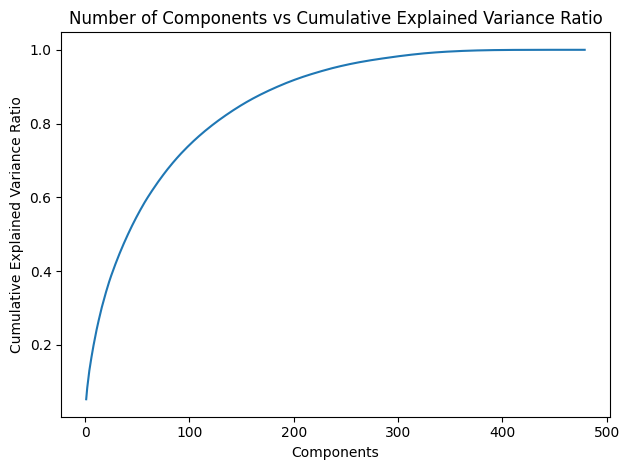

In [69]:
cum_evrAll = list(
    zip(range(1, UAll.shape[1] + 1), np.cumsum(svdAll.explained_variance_ratio_))
)

cum_evrAll_df = pd.DataFrame(cum_evrAll).set_index(0)

cum_evrAll_df.plot(
    title="Number of Components vs Cumulative Explained Variance Ratio",
    xlabel="Components",
    ylabel="Cumulative Explained Variance Ratio",
    legend=False,
)

plt.tight_layout()

In [70]:
svd200 = TruncatedSVD(n_components=200)

U200 = svd200.fit_transform(X_centered)

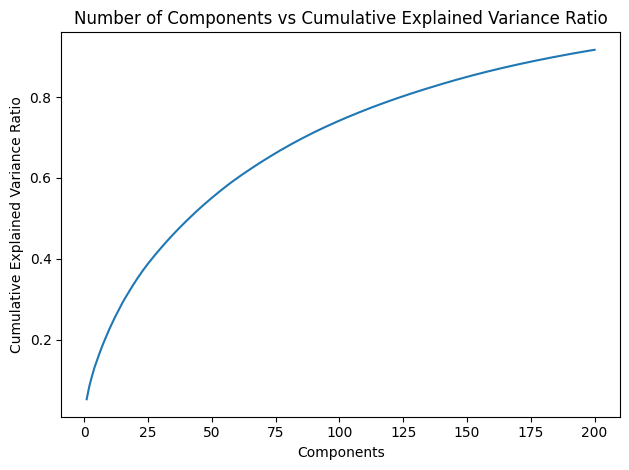

In [71]:
cum_evr200 = list(
    zip(range(1, U200.shape[1] + 1), np.cumsum(svd200.explained_variance_ratio_))
)

cum_evr200_df = pd.DataFrame(cum_evr200).set_index(0)

cum_evr200_df.plot(
    title="Number of Components vs Cumulative Explained Variance Ratio",
    xlabel="Components",
    ylabel="Cumulative Explained Variance Ratio",
    legend=False,
)

plt.tight_layout()

In [72]:
vector_length = X_centered.shape[1]
new_user = np.full(vector_length, np.NaN)

new_user_df = pd.DataFrame([new_user], columns=X_centered.columns)
new_user_df

new_user_df

Book-Author,A. A. Milne,Agatha Christie,Alan Dean Foster,Albert Camus,Aldous Huxley,Alexandre Dumas,Alice Hoffman,Alice Walker,Alistair MacLean,Amy Tan,...,Walt Disney Productions,Warren Murphy,Whitley Strieber,Wilkie Collins,Willa Cather,William Faulkner,William Shakespeare,William Shatner,Wolfgang Hohlbein,Zane Grey
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
new_user_df["Albert Camus"] = 8
new_user_df["Agatha Christie"] = 5
new_user_df["William Shakespeare"] = 9
new_user_df["Franz Kafka"] = 10
new_user_df["Walt Disney Productions"] = 4
new_user_df["Italo Calvino"] = 8

new_user_df

Book-Author,A. A. Milne,Agatha Christie,Alan Dean Foster,Albert Camus,Aldous Huxley,Alexandre Dumas,Alice Hoffman,Alice Walker,Alistair MacLean,Amy Tan,...,Walt Disney Productions,Warren Murphy,Whitley Strieber,Wilkie Collins,Willa Cather,William Faulkner,William Shakespeare,William Shatner,Wolfgang Hohlbein,Zane Grey
0,NaN,5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN


In [74]:
new_user_df.T.dropna()

,0
Book-Author,
Agatha Christie,5.0
Albert Camus,8.0
Franz Kafka,10.0
Italo Calvino,8.0
Walt Disney Productions,4.0
William Shakespeare,9.0


In [75]:
new_user_fillna_df = new_user_df.fillna(mean_rating)

# center the data
new_user_centered_df = new_user_fillna_df - X.mean()

new_user_centered_df

Book-Author,A. A. Milne,Agatha Christie,Alan Dean Foster,Albert Camus,Aldous Huxley,Alexandre Dumas,Alice Hoffman,Alice Walker,Alistair MacLean,Amy Tan,...,Walt Disney Productions,Warren Murphy,Whitley Strieber,Wilkie Collins,Willa Cather,William Faulkner,William Shakespeare,William Shatner,Wolfgang Hohlbein,Zane Grey
0,-0.000487,-2.526824,0.000043,0.470507,-0.004985,-0.000243,0.002691,-0.002759,0.001294,-0.005152,...,-3.524713,0.000538,-0.00073,0.001089,-0.002435,0.001627,1.466405,0.003861,0.003007,-0.000487


In [76]:
new_user_200d = svd200.transform(new_user_centered_df)

print(new_user_200d.shape)

new_user_200d

(1, 200)


array([[-3.59809208e-02,  3.41945678e-02, -1.51122096e-01,
         6.62711176e-02, -2.12197250e-01,  9.53892181e-02,
        -9.27158054e-02,  3.23836859e-01,  3.42198617e-01,
        -4.27967698e-02,  2.88387363e-01,  9.78388082e-02,
        -1.28126530e-01,  5.22638330e-02,  2.56252221e-03,
        -1.17174741e-02, -1.03294970e-01,  4.13755999e-02,
        -2.32572944e-01, -3.19310182e-01,  4.57758034e-01,
        -1.43189137e-02, -3.08116928e-02,  2.07899514e-02,
        -1.21683047e-01,  7.96316196e-01, -4.86008597e-01,
        -3.21432387e-01, -2.42579205e-01,  2.24471175e-01,
        -4.74113742e-01, -2.59773640e-01,  3.04625319e-01,
        -3.09313449e-01, -2.38327917e-01,  1.43470100e-01,
         9.22570982e-02,  7.08173006e-02, -7.51572484e-02,
         1.20707537e-01, -8.61818868e-02,  4.84762306e-03,
        -3.57560641e-02,  9.28886426e-03,  1.72038173e-02,
         1.25580725e-01,  2.56434379e-02,  1.34229173e-02,
        -1.16538568e-01,  4.47108628e-01, -6.95054885e-0

In [77]:
new_user_pred = np.dot(new_user_200d, svd200.components_)

new_user_pred

array([[-8.70426579e-03, -2.46603547e+00, -5.46958533e-03,
         1.84912305e-01, -6.93046547e-03,  1.60630553e-03,
         2.44690623e-02, -5.17465725e-03,  1.79953392e-02,
         5.74771641e-03,  2.25639013e-02,  1.74292656e-02,
         1.82507094e-02,  1.87465829e-02, -2.16029733e-02,
        -4.13514035e-02, -1.95655972e-03,  8.00931013e-03,
        -9.10785659e-02,  4.07223417e-03,  3.17999532e-02,
        -6.97165033e-04,  4.58671308e-03,  4.72172484e-03,
        -2.03729869e-04, -3.08235371e-02,  1.00140135e-02,
        -2.01583417e-02,  3.84274774e-04,  3.03894207e-02,
        -2.46033728e-02,  3.58322710e-02,  5.30909957e-02,
         2.14923577e-01,  1.35654615e-03,  4.48744149e-03,
        -4.98153708e-02,  9.65314162e-04,  2.91350575e-03,
        -2.12034766e-02, -1.99432645e-02,  2.14037454e-01,
        -3.07000616e-02, -2.04709659e-01, -1.36847093e-02,
        -8.29716377e-03,  4.15918467e-03, -3.43194407e-03,
         1.15663562e-03, -6.09345723e-03, -2.84394810e-0

In [78]:
new_user_recs = pd.DataFrame(new_user_pred, columns=X.columns)

top_recs = new_user_recs.T.sort_values(by=0, ascending=False)
top_recs.columns = ["Predicted_Rating"]
top_recs.reset_index(inplace=True)
top_recs.head()

,Book-Author,Predicted_Rating
0,Franz Kafka,2.388119
1,William Shakespeare,1.447076
2,Astrid Lindgren,0.214924
3,Barbara Park,0.214037
4,Albert Camus,0.184912


In [79]:
already_rated = new_user_df.T.dropna().index

top_recs_final = top_recs[~top_recs["Book-Author"].isin(already_rated)]
top_recs_final.head(10)

,Book-Author,Predicted_Rating
2,Astrid Lindgren,0.214924
3,Barbara Park,0.214037
5,Joan Lowery Nixon,0.170812
6,Eve Bunting,0.159509
7,Laura Ingalls Wilder,0.133549
8,James Ellroy,0.111114
9,Walt Disney,0.099271
10,Elizabeth George,0.086241
11,Bill Watterson,0.080568
12,Donald J. Sobol,0.075375
